<a href="https://colab.research.google.com/github/sujala-tamma/Facial-Emotion-Detection/blob/main/train_model_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"tammasujala","key":"617c61c1e60010d6de42bb8be7201950"}'}

In [5]:
import shutil

# Rename the file to kaggle.json
#shutil.move("kaggle (1).json", "kaggle.json")

# Create the .kaggle directory and move the file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets list -s fer2013


401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/datasets/list?group=public&sortby=hottest&size=all&filetype=all&license=all&viewed=unspecified&search=fer2013&page=1


In [7]:
!kaggle datasets download -d msambare/fer2013
!unzip fer2013.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
# Paths (Make sure you unzip fer2013.zip and these folders exist)
train_dir = '/content/train'
test_dir = '/content/test'

In [10]:
# Emotion labels (must match the subfolder names in train/test)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


In [11]:
# Image size and batch size
img_size = (48, 48)
batch_size = 64

In [12]:
# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
# Improved Model architecture
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,472,711 (9.43 MB)

 Trainable params: 2,471,815 (9.43 MB)

 Non-trainable params: 896 (3.50 KB)

In [18]:
# Train model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=25
)

# Save model
model.save('emotion_model.h5')

Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 32s 71ms/step - accuracy: 0.6826 - loss: 0.8508 - val_accuracy: 0.6188 - val_loss: 1.0712
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.6919 - loss: 0.8362 - val_accuracy: 0.6170 - val_loss: 1.0702
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.6956 - loss: 0.8267 - val_accuracy: 0.5805 - val_loss: 1.1910
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.6949 - loss: 0.8131 - val_accuracy: 0.5789 - val_loss: 1.1909
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.6991 - loss: 0.7958 - val_accuracy: 0.6227 - val_loss: 1.0861
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7107 - loss: 0.7838 - val_accuracy: 0.6046 - val_loss: 1.0898
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.7150 - loss: 0.7689 - val_accuracy: 0.6133 - val_loss: 1.1662
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7226 - loss: 0.7476 - 

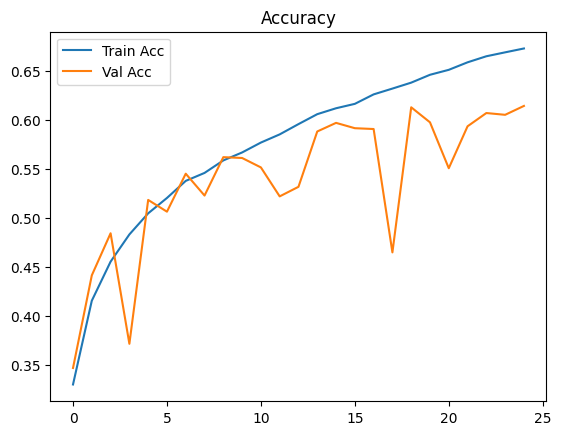

In [15]:
# Accuracy and loss plots
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')
plt.show()


In [16]:
# Evaluate model
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.2f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5549 - loss: 1.2186
Test Accuracy: 0.61


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


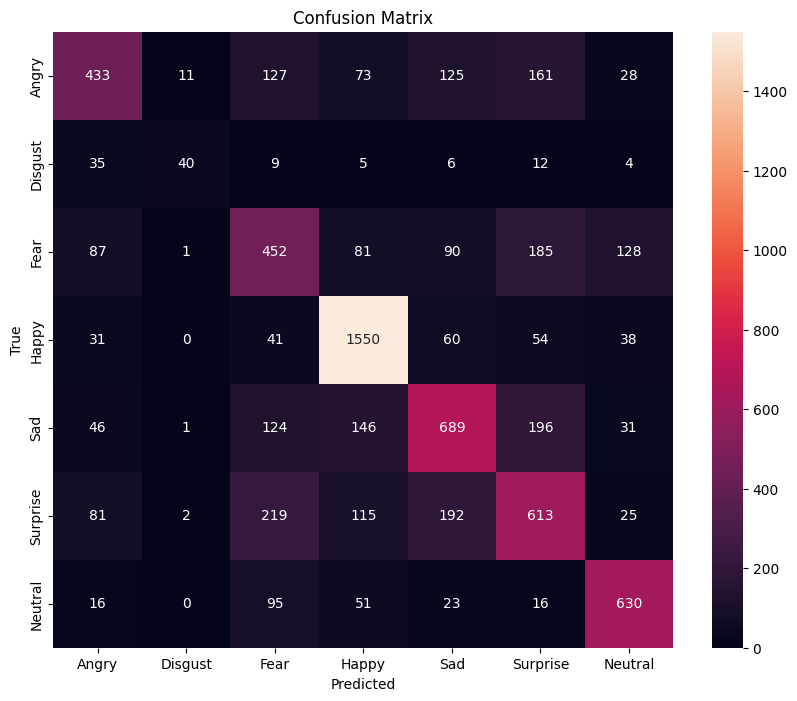

              precision    recall  f1-score   support

       Angry       0.59      0.45      0.51       958
     Disgust       0.73      0.36      0.48       111
        Fear       0.42      0.44      0.43      1024
       Happy       0.77      0.87      0.82      1774
         Sad       0.58      0.56      0.57      1233
    Surprise       0.50      0.49      0.49      1247
     Neutral       0.71      0.76      0.73       831

    accuracy                           0.61      7178
   macro avg       0.61      0.56      0.58      7178
weighted avg       0.61      0.61      0.61      7178



In [17]:
# Confusion matrix
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=emotion_labels))

In [19]:
from google.colab import files
files.download('emotion_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>